In [1]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc          
import pandas as pd                                                    
import numpy as np                                                     
import scanpy as sc                                                                                                                                     
import sys
import anndata
from scvi.dataset import RetinaDataset
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scvic.utils import entropy_batch_mixing

%matplotlib inline

seed = 1
random.seed(seed)
np.random.seed(seed)
tf.set_random_seed(seed)

/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Fut

In [2]:
save_path = "../Datasets/Biological Datasets"
retina_dataset = RetinaDataset(save_path=save_path)
retina_dataset.filter_genes_by_count(per_batch=True)
retina_dataset.make_gene_names_lower()
retina_dataset.subsample_genes(4000)

[2022-09-18 13:50:25,717] INFO - scvi.dataset.dataset | File /data/xiong/scVIC/notebooks/Datasets/Biological Datasets/retina.loom already downloaded
[2022-09-18 13:50:25,719] INFO - scvi.dataset.loom | Preprocessing dataset
[2022-09-18 13:50:33,523] INFO - scvi.dataset.loom | Finished preprocessing dataset
[2022-09-18 13:50:35,026] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2022-09-18 13:50:35,029] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2022-09-18 13:50:35,397] INFO - scvi.dataset.dataset | Downsampling from 13166 to 13085 genes
[2022-09-18 13:50:42,787] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2022-09-18 13:50:43,614] INFO - scvi.dataset.dataset | Filtering non-expressing cells.
[2022-09-18 13:50:50,902] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2022-09-18 13:50:51,263] INFO - scvi.dataset.dataset | Downsampled from 19829 to 19829 cells
[2022-09-18 13:50:51,265] INFO - scvi.datase

/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[2022-09-18 13:50:55,834] INFO - scvi.dataset.dataset | Downsampling from 13085 to 4000 genes


/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/scvi/dataset/dataset.py:1557: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[:n_top_genes, "highly_variable"] = True


[2022-09-18 13:50:58,165] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2022-09-18 13:50:58,411] INFO - scvi.dataset.dataset | Filtering non-expressing cells.
[2022-09-18 13:51:00,605] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2022-09-18 13:51:00,714] INFO - scvi.dataset.dataset | Downsampled from 19829 to 19829 cells


In [3]:
save_dir="result_retina"
                
adata = anndata.AnnData(X=retina_dataset.X)
labels_=pd.Series(retina_dataset.labels.squeeze(), index=adata.obs.index, dtype='category')
labels_.cat.categories=list(range(len(labels_.unique())))
batches_=pd.Series(retina_dataset.batch_indices.squeeze(), index=adata.obs.index, dtype='category')
batches_.cat.categories=list(range(len(batches_.unique())))
        
adata.obs["labels"]=labels_
adata.obs["batches"]=batches_
adata=desc.scale_bygroup(adata, groupby="batches")# if the the dataset has two or more batches you can use `adata=desc.scale(adata,groupby="BatchID")`

In [4]:
adata=desc.train(adata,
        dims=[adata.shape[1],64,32],
        tol=0.005,
        n_clusters=retina_dataset.n_labels,
        n_neighbors=10,
        batch_size=256,
        save_dir=str(save_dir),
        do_tsne=False,
        learning_rate=200, # the parameter of tsne
        use_GPU=False,
        num_Cores=1, #for reproducible, only use 1 cpu
        num_Cores_tsne=4,
        save_encoder_weights=False,
        save_encoder_step=3,# save_encoder_weights is False, this parameter is not used
        use_ae_weights=False,
        do_umap=False,
        random_seed=seed) #if do_uamp is False, it will don't compute umap coordiate

The number of cpu in your computer is 80
use_ae_weights=False, the program will rerun autoencoder
Pretraining the 1th layer...
learning rate = 0.1
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/50
19829/19829 [==============================] - 8s 405us/step - loss: 0.6426
Epoch 2/50
19829/19829 [==============================] - 8s 403us/step - loss: 0.6344
Epoch 3/50
19829/19829 [==============================] - 8s 400us/step - loss: 0.6276
Epoch 4/50
19829/19829 [==============================] - 8s 403us/step - loss: 0.6198
Epoch 5/50
19829/19829 [==============================] - 8s 402us/step - loss: 0.6148
Epoch 6/50
19829/19829 [==============================] - 8s 403us/step - loss: 0.6116
Epoch 7/50
19829/19829 [==============================] - 8s 406us/step - loss: 0.6085
Epoch 8/50
19829/19829 [==============================] - 8s 403us/step - loss: 0.6055
Epoch 9/50
19829/19829 [==============================] - 8s 401us/step - loss: 0.60

19829/19829 [==============================] - 7s 351us/step - loss: 0.5703
Epoch 32/50
19829/19829 [==============================] - 7s 349us/step - loss: 0.5702
Epoch 33/50
19829/19829 [==============================] - 7s 351us/step - loss: 0.5701
Epoch 34/50
19829/19829 [==============================] - 7s 343us/step - loss: 0.5700
Epoch 35/50
19829/19829 [==============================] - 6s 301us/step - loss: 0.5699
Epoch 36/50
19829/19829 [==============================] - 5s 265us/step - loss: 0.5698
Epoch 37/50
19829/19829 [==============================] - 6s 326us/step - loss: 0.5697
Epoch 38/50
19829/19829 [==============================] - 7s 344us/step - loss: 0.5696
Epoch 39/50
19829/19829 [==============================] - 7s 346us/step - loss: 0.5695
Epoch 40/50
19829/19829 [==============================] - 7s 341us/step - loss: 0.5694
Epoch 41/50
19829/19829 [==============================] - 7s 338us/step - loss: 0.5694
Epoch 42/50
19829/19829 [===================

Epoch 24/50
19829/19829 [==============================] - 7s 354us/step - loss: 0.5678
Epoch 25/50
19829/19829 [==============================] - 7s 355us/step - loss: 0.5678
Epoch 26/50
19829/19829 [==============================] - 7s 351us/step - loss: 0.5678
Epoch 27/50
19829/19829 [==============================] - 7s 354us/step - loss: 0.5678
Epoch 28/50
19829/19829 [==============================] - 7s 351us/step - loss: 0.5678
Epoch 29/50
19829/19829 [==============================] - 7s 352us/step - loss: 0.5678
Epoch 30/50
19829/19829 [==============================] - 7s 351us/step - loss: 0.5678
Epoch 31/50
19829/19829 [==============================] - 7s 352us/step - loss: 0.5678
Epoch 32/50
19829/19829 [==============================] - 7s 351us/step - loss: 0.5678
Epoch 33/50
19829/19829 [==============================] - 7s 350us/step - loss: 0.5678
Epoch 34/50
19829/19829 [==============================] - 7s 351us/step - loss: 0.5678
Epoch 35/50
19829/19829 [=======

19829/19829 [==============================] - 2s 117us/step - loss: 0.0351
Epoch 3/5
19829/19829 [==============================] - 2s 113us/step - loss: 0.0297
Epoch 4/5
19829/19829 [==============================] - 2s 114us/step - loss: 0.0259
Epoch 5/5
19829/19829 [==============================] - 2s 113us/step - loss: 0.0230
The value of delta_label of current 2 th iteration is 0.06152604770790257 >= tol 0.005
Epoch 1/5
19829/19829 [==============================] - 2s 117us/step - loss: 0.1220
Epoch 2/5
19829/19829 [==============================] - 2s 115us/step - loss: 0.0952
Epoch 3/5
19829/19829 [==============================] - 2s 99us/step - loss: 0.0767
Epoch 4/5
19829/19829 [==============================] - 2s 97us/step - loss: 0.0641
Epoch 5/5
19829/19829 [==============================] - 2s 111us/step - loss: 0.0551
The value of delta_label of current 3 th iteration is 0.05027989308588431 >= tol 0.005
Epoch 1/5
19829/19829 [==============================] - 2s 115u

19829/19829 [==============================] - 2s 113us/step - loss: 0.2334
Epoch 2/5
19829/19829 [==============================] - 2s 113us/step - loss: 0.2306
Epoch 3/5
19829/19829 [==============================] - 2s 115us/step - loss: 0.2284
Epoch 4/5
19829/19829 [==============================] - 2s 113us/step - loss: 0.2264
Epoch 5/5
19829/19829 [==============================] - 2s 113us/step - loss: 0.2245
delta_label  0.004387513238186495 < tol  0.005
Reached tolerance threshold. Stop training.
The final prediction cluster is:
0     4244
1     2038
2     2216
3     1816
4     1667
5     1373
6     1312
7     1246
8      951
9      860
10     614
11     432
12     420
13     413
14     227
dtype: int64
The desc has been trained successfully!!!!!!
The summary of desc model is:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 4000)              0         
_____

In [5]:
post_adata = anndata.AnnData(X=adata.obsm["X_Embeded_z1.0"])
post_adata.obsm["X_DESC"] = adata.obsm["X_Embeded_z1.0"]
post_adata.obs['cell_type'] = np.array([retina_dataset.cell_types[retina_dataset.labels[i][0]]  
                                        for i in range(post_adata.n_obs)])
post_adata.obs['batch'] = np.array([str(retina_dataset.batch_indices[i][0])
                                   for i in range(post_adata.n_obs)])
labels_pred=pd.Series(adata.obs["desc_1.0"], index=post_adata.obs.index, dtype='category')
labels_pred.cat.categories=list(range(len(adata.obs["desc_1.0"].unique())))
post_adata.obs['predicted_type'] = labels_pred
sc.pp.neighbors(post_adata, use_rep="X_DESC", n_neighbors=15)
sc.tl.tsne(post_adata, n_jobs=8)
show_plot = True

... storing 'cell_type' as categorical
... storing 'batch' as categorical


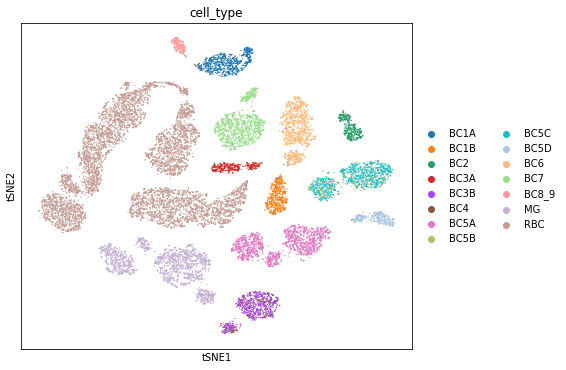

In [6]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.tsne(post_adata, color=["cell_type"], ax=ax, show=show_plot)

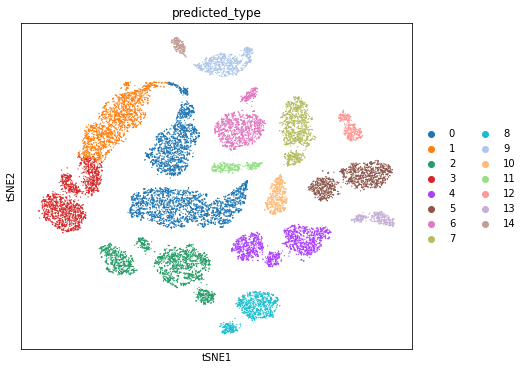

In [7]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.tsne(post_adata, color=["predicted_type"], ax=ax, show=show_plot)

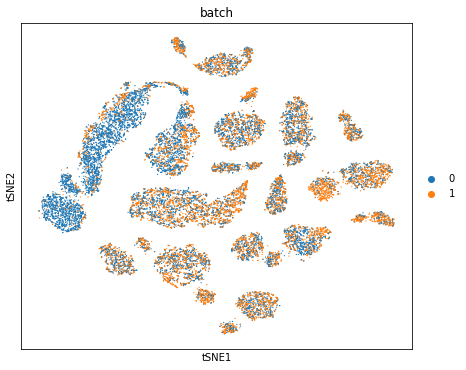

In [8]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.tsne(post_adata, color=["batch"], ax=ax, show=show_plot)

In [9]:
ARI = np.around(adjusted_rand_score(retina_dataset.labels.squeeze(), adata.obs["desc_1.0"]), 5)
NMI = np.around(normalized_mutual_info_score(retina_dataset.labels.squeeze(), adata.obs["desc_1.0"], average_method='arithmetic'), 5)
entropy_batch_mixing = np.around(entropy_batch_mixing(adata.obsm["X_Embeded_z1.0"], retina_dataset.batch_indices, retina_dataset.n_batches), 5)
print("ARI_DESC: ")
print(ARI)

print("NMI_DESC: ")
print(NMI)

print("BatchMixing_DESC: ")
print(entropy_batch_mixing)

ARI_DESC: 
0.58861
NMI_DESC: 
0.85622
BatchMixing_DESC: 
0.13607


In [10]:
saved_data = anndata.AnnData(X=adata.obsm["X_Embeded_z1.0"])
saved_data.obs['cell_type'] = post_adata.obs['cell_type']
saved_data.obs['predicted_type'] = post_adata.obs['predicted_type']
saved_data.obsm["default_visualization"] = post_adata.obsm["X_tsne"]
saved_data.uns["ari"] = ARI
saved_data.uns["nmi"] = NMI
saved_data.uns["entropy_batch_mixing"] = entropy_batch_mixing
saved_data.uns["default_visualization_method"] = 'tsne'
saved_data.write_h5ad("../Saved_Data/DESC/RETINA_DESC.h5")